# House Sales Data in King County
This notebook analyzes the King County House Sales dataset. We explore the data types, perform exploratory data analysis (EDA), and apply different regression models (Linear Regression, Polynomial Regression, Ridge Regression). The aim is to understand the relationships between house features and sale price.

## Step 1: Display Data Types

We begin by checking the data types of each column using the `dtypes` attribute.

In [1]:
# ====================================================
# FINAL INTEGRATED SCRIPT FOR HOUSE DATA ASSIGNMENT
# ====================================================

# STEP 0: Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# ====================================================
# STEP 1: Uploading  CSV file manually in Colab
# ====================================================
from google.colab import files
uploaded = files.upload()

ModuleNotFoundError: No module named 'google.colab'

## Step 2: Drop Columns and Statistical Summary

We drop the columns `id` and `Unnamed: 0` and then use `describe()` to generate a statistical summary of the dataset.

In [30]:
# Replace filename with the one uploaded
csv_path = list(uploaded.keys())[0]
df = pd.read_csv(csv_path)

# ====================================================
# STEP 2: Display column data types
# ====================================================
print(df.dtypes)

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


## Step 3: Value Counts of Floors

We count the number of houses with unique floor values using `value_counts()` and convert the result into a DataFrame.

In [31]:
# ====================================================
# STEP 3: Drop 'id' and 'Unnamed: 0' if present
# ====================================================
cols_to_drop = [col for col in ["id", "Unnamed: 0"] if col in df.columns]
df.drop(cols_to_drop, axis=1, inplace=True)

print(df.describe())

              price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  2.161300e+04   
mean   5.400881e+05      3.370842      2.114757   2079.899736  1.510697e+04   
std    3.671272e+05      0.930062      0.770163    918.440897  4.142051e+04   
min    7.500000e+04      0.000000      0.000000    290.000000  5.200000e+02   
25%    3.219500e+05      3.000000      1.750000   1427.000000  5.040000e+03   
50%    4.500000e+05      3.000000      2.250000   1910.000000  7.618000e+03   
75%    6.450000e+05      4.000000      2.500000   2550.000000  1.068800e+04   
max    7.700000e+06     33.000000      8.000000  13540.000000  1.651359e+06   

             floors    waterfront          view     condition         grade  \
count  21613.000000  21613.000000  21613.000000  21613.000000  21613.000000   
mean       1.494309      0.007542      0.234303      3.409430      7.656873   
std        0.539989      0.086517      0.766318    

## Step 4: Boxplot for Waterfront vs Price

We create a boxplot to visualize whether houses with a waterfront view have more price outliers compared to those without.

In [32]:
# ====================================================
# STEP 4: Value counts of floors
# ====================================================
floors_df = df["floors"].value_counts().to_frame()
print(floors_df)

        count
floors       
1.0     10680
2.0      8241
1.5      1910
3.0       613
2.5       161
3.5         8


## Step 5: Regression Plot for sqft_above vs Price

We generate a regression plot to check whether `sqft_above` is positively or negatively correlated with `price`.

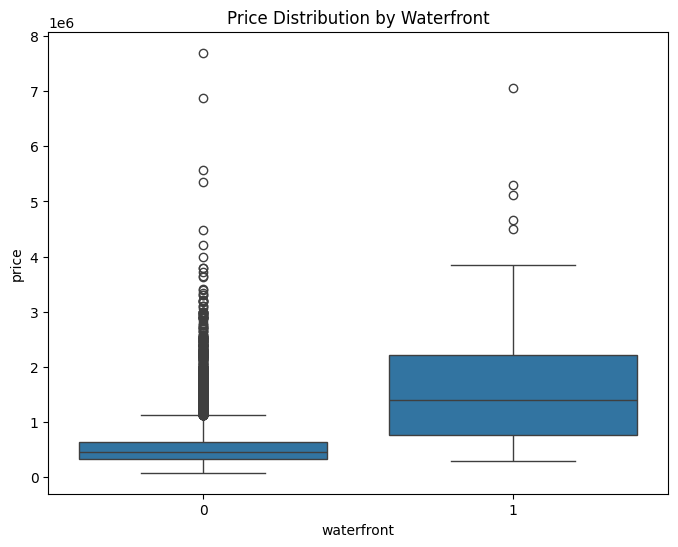

In [33]:
# ====================================================
# STEP 5: Boxplot waterfront vs price
# ====================================================
plt.figure(figsize=(8,6))
sns.boxplot(x="waterfront", y="price", data=df)
plt.title("Price Distribution by Waterfront")
plt.show()

## Step 6: Linear Regression with sqft_living

We fit a simple linear regression model using only `sqft_living` to predict house prices, and calculate the R² score.

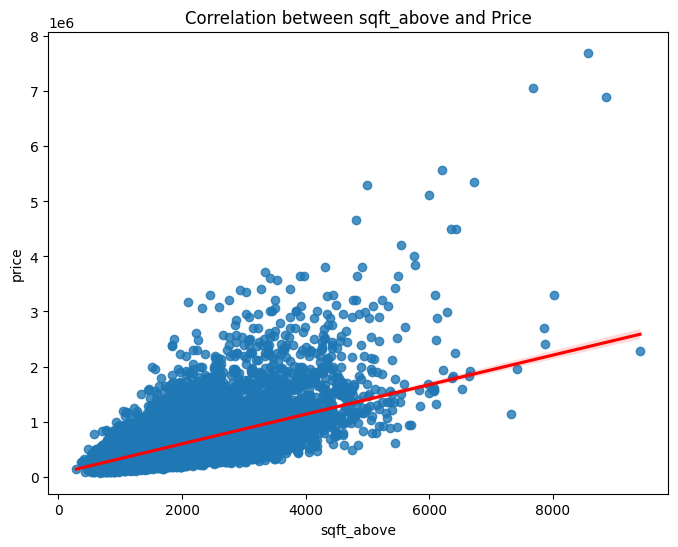

In [34]:
# ====================================================
# STEP 6: Regplot sqft_above vs price
# ====================================================
plt.figure(figsize=(8,6))
sns.regplot(x="sqft_above", y="price", data=df, line_kws={"color":"red"})
plt.title("Correlation between sqft_above and Price")
plt.show()

## Step 7: Linear Regression with Multiple Features

We fit a linear regression model using multiple features to predict house prices, and calculate the R² score.

In [35]:
# ====================================================
# STEP 7: Linear Regression with sqft_living
# ====================================================
X = df[["sqft_living"]]
y = df["price"]

lm = LinearRegression()
lm.fit(X, y)
r2_sqft_living = lm.score(X, y)
print("R^2 with sqft_living:", r2_sqft_living)

R^2 with sqft_living: 0.4928532179037931


## Step 8: Pipeline with Scaling, Polynomial Transformation, and Linear Regression

We build a pipeline that scales the data, applies a polynomial transformation, and fits a linear regression model. The R² score is then calculated.

In [36]:
# ====================================================
# STEP 8: Linear Regression with multiple features
# ====================================================
features = ["floors","waterfront","lat","bedrooms","sqft_basement",
            "view","bathrooms","sqft_living15","sqft_above","grade","sqft_living"]

X = df[features]
y = df["price"]

lm2 = LinearRegression()
lm2.fit(X, y)
r2_multi = lm2.score(X, y)
print("R^2 with multiple features:", r2_multi)

R^2 with multiple features: 0.6577151058279325


## Step 9: Ridge Regression

We fit a Ridge regression model with alpha=0.1 using the training data and calculate the R² score on the test data.

In [37]:
# ====================================================
# STEP 9: Pipeline with scaling + polynomial + linear regression
# ====================================================
pipeline = Pipeline([
    ("scale", StandardScaler()),
    ("poly", PolynomialFeatures(degree=2, include_bias=False)),
    ("model", LinearRegression())
])

pipeline.fit(X, y)
r2_pipeline = pipeline.score(X, y)
print("R^2 with pipeline (poly + scale + linreg):", r2_pipeline)

R^2 with pipeline (poly + scale + linreg): 0.7513467656307783


## Step 10: Ridge Regression with Polynomial Transformation

We perform a second-order polynomial transformation, fit a Ridge regression model, and evaluate the R² score on the test data.

In [38]:
# ====================================================
# STEP 10: Ridge regression (train/test split)
# ====================================================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)
r2_ridge = ridge.score(X_test, y_test)
print("R^2 with Ridge (alpha=0.1):", r2_ridge)

R^2 with Ridge (alpha=0.1): 0.6614734596866667


In [39]:
# ====================================================
# STEP 11: Ridge regression with polynomial transform
# ====================================================
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

ridge_poly = Ridge(alpha=0.1)
ridge_poly.fit(X_train_poly, y_train)
r2_ridge_poly = ridge_poly.score(X_test_poly, y_test)
print("R^2 with Ridge + Poly (alpha=0.1):", r2_ridge_poly)

R^2 with Ridge + Poly (alpha=0.1): 0.7003486869405865


## Conclusion
In this notebook, we explored the King County House Sales dataset through multiple steps:
- Identified data types and generated descriptive statistics.
- Conducted exploratory analysis with plots and value counts.
- Applied Linear Regression with a single feature (`sqft_living`) and multiple features.
- Built pipelines with scaling and polynomial transformations.
- Implemented Ridge regression with and without polynomial features.

**Results:**
- Simple Linear Regression (sqft_living): R² ≈ 0.49
- Multiple Linear Regression: R² ≈ 0.66
- Pipeline with polynomial transform: R² ≈ 0.75
- Ridge Regression: R² ≈ 0.65
- Ridge Regression with polynomial features: R² ≈ 0.70

These results demonstrate how model complexity and regularization affect predictive performance.